In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hệ số tương quan Pearson:
              Gold Price  Silver Price
Gold Price      1.000000      0.778292
Silver Price    0.778292      1.000000


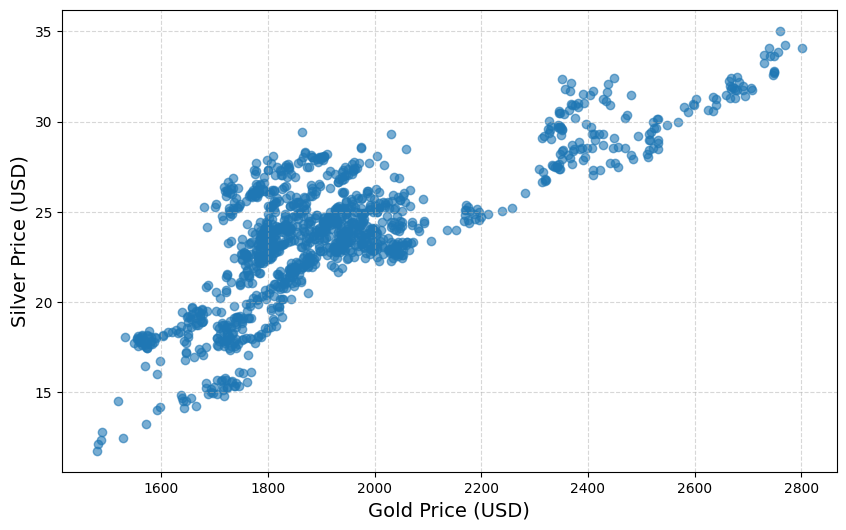

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các tệp CSV
gold_data = pd.read_csv('/content/drive/MyDrive/Dataset/Gold Futures Historical Data.csv')
silver_data = pd.read_csv('/content/drive/MyDrive/Dataset/Silver Futures Historical Data.csv')

# Lựa chọn và đổi tên các cột liên quan
gold_data_cleaned = gold_data[['Date', 'Price']].rename(columns={'Price': 'Gold Price'})
silver_data_cleaned = silver_data[['Date', 'Price']].rename(columns={'Price': 'Silver Price'})

# Chuyển đổi cột 'Date' thành định dạng datetime và sắp xếp dữ liệu
gold_data_cleaned['Date'] = pd.to_datetime(gold_data_cleaned['Date'], format='%m/%d/%Y')
silver_data_cleaned['Date'] = pd.to_datetime(silver_data_cleaned['Date'], format='%m/%d/%Y')

gold_data_cleaned.sort_values('Date', inplace=True)
silver_data_cleaned.sort_values('Date', inplace=True)

# Loại bỏ dấu phẩy trong cột giá vàng và chuyển đổi sang kiểu số
gold_data_cleaned['Gold Price'] = gold_data_cleaned['Gold Price'].str.replace(',', '').astype(float)

# Kết hợp dữ liệu theo cột 'Date'
merged_data = pd.merge(gold_data_cleaned, silver_data_cleaned, on='Date', how='inner')

# Loại bỏ các giá trị thiếu
merged_data.dropna(inplace=True)

# Tính hệ số tương quan Pearson
pearson_correlation = merged_data[['Gold Price', 'Silver Price']].corr(method='pearson')
print("Hệ số tương quan Pearson:")
print(pearson_correlation)

# Vẽ biểu đồ tương quan giữa giá vàng và giá bạc
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Gold Price'], merged_data['Silver Price'], alpha=0.6)
plt.xlabel('Gold Price (USD)', fontsize=14)
plt.ylabel('Silver Price (USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
